In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from nengo_bg import sBCBG
import nengo
import nengo_ocl
from nengo.utils.matplotlib import rasterplot


In [2]:
model = nengo.Network(label='Basal Ganglia')
with model:
    basal_ganglia = sBCBG(3, .005, input_bias=0., output_weight=1.)

    
timescale=1.

class ActionIterator(object):
    def __init__(self, dimensions):
        self.actions = np.ones(dimensions)

    def step(self, t):
        # one action at time dominates
        #print(t)
        dominate = int(t*timescale % 3)
        self.actions[:] = 0.
        self.actions[dominate] = 5.
        return self.actions


action_iterator = ActionIterator(dimensions=3)

with model:
    actions = nengo.Node(action_iterator.step, label="actions")
    
    nengo.Connection(actions, basal_ganglia.input, synapse=None)
    selected_action = nengo.Probe(basal_ganglia.output)
    input_actions = nengo.Probe(actions)
    CSN = [nengo.Probe(basal_ganglia.pops['CSN'][d].neurons) for d in range(3)]
    MSN = [nengo.Probe(basal_ganglia.pops['MSN'][d].neurons) for d in range(3)]
    GPi = [nengo.Probe(basal_ganglia.pops['GPi'][d].neurons) for d in range(3)]
    

('nbCh', 2)
Command Line Parameters
['/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py', '-f', '/run/user/1000/jupyter/kernel-b085f197-6d3d-46c5-9a76-cb4033dd1ad6.json']
('Incorrect number of parameters:', 3, '-', 38, 'expected')
('/!\\ Using the following LG14 parameterization', 9)
### Parameterization #9 from (Lienard & Girard, 2014) is used. ###
INFO: keeping LG14 value for theta in GPi to its original value of 6.2
INFO: keeping LG14 value for theta in GPe to its original value of 10.5
INFO: keeping LG14 value for theta in STN to its original value of 26.1
INFO: keeping LG14 value for theta in Prot to its original value of 10.5
INFO: keeping LG14 value for theta in MSN to its original value of 30.0
INFO: keeping LG14 value for theta in Arky to its original value of 10.5
INFO: keeping LG14 value for theta in FSI to its original value of 16.2

Creating neurons
('* MSN:', 7932.0, 'neurons (divided in', 3, 'channels) with parameters:', {'tau_m': 13.0, 'C_m': 13.0, 'V_th': 30

In [3]:

with nengo_ocl.Simulator(model) as sim:
    sim.run(1./timescale)

No context argument was provided to nengo_ocl.Simulator
Calling pyopencl.create_some_context() for you now:


/usr/local/lib/python2.7/dist-packages/nengo/neurons.py:381: RuntimeWarning: divide by zero encountered in log1p
  1.0 / (gain * (intercepts - 1) - 1)))


Simulation finished in 0:01:37.                                                 


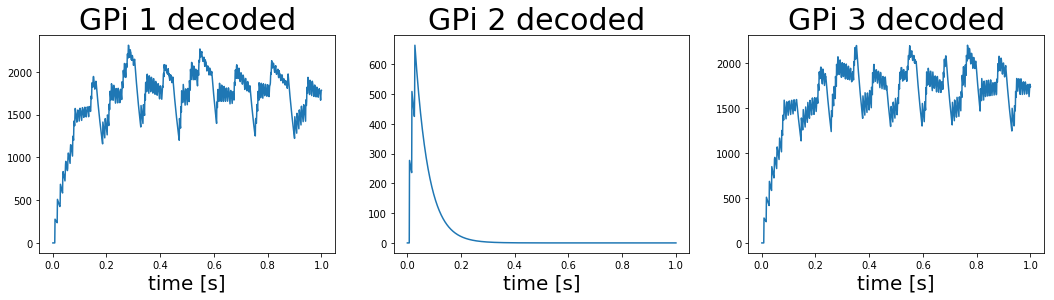

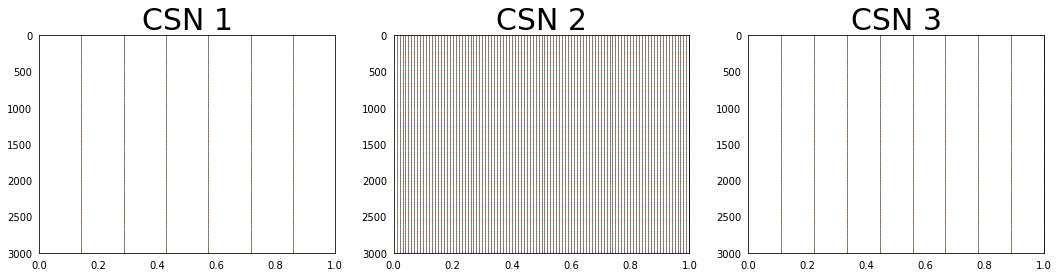

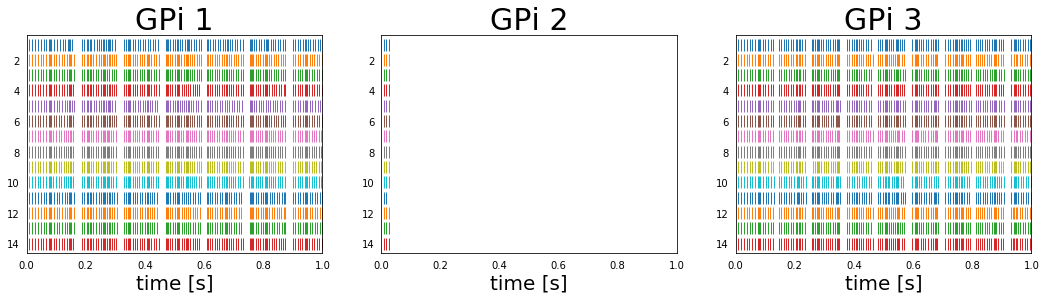

In [4]:
'''plt.figure()


plt.subplot(2, 1, 1)
plt.plot(sim.trange(), sim.data[input_actions].argmax(axis=1))
plt.ylim(-0.1, 2.1)
plt.xlabel('time [s]')
plt.title("Index of actual max value")

plt.show()'''

plt.figure(figsize=(18,4))

plt.subplot(131)

plt.plot(sim.trange(), sim.data[selected_action][:,0])
plt.xlabel('time [s]')
plt.title('GPi 1 decoded', fontdict={'size':30})
plt.xlabel('time [s]', fontdict={"size":20})


plt.subplot(132)

plt.plot(sim.trange(), sim.data[selected_action][:,1])
plt.xlabel('time [s]')
plt.title('GPi 2 decoded ', fontdict={'size':30})
plt.xlabel('time [s]', fontdict={"size":20})


plt.subplot(133)

plt.plot(sim.trange(), sim.data[selected_action][:,2])
plt.xlabel('time [s]')
plt.title('GPi 3 decoded', fontdict={'size':30})
plt.xlabel('time [s]', fontdict={"size":20})

plt.show()


plt.figure(figsize=(18,4))

plt.subplot(131)
rasterplot(sim.trange(), sim.data[CSN[0]])
plt.title("CSN 1", fontdict={'size':30})

plt.subplot(132)

rasterplot(sim.trange(), sim.data[CSN[1]])
plt.title("CSN 2", fontdict={'size':30})


plt.subplot(133)

rasterplot(sim.trange(), sim.data[CSN[2]])
plt.title("CSN 3", fontdict={'size':30})

plt.show()
'''rasterplot(sim.trange(), sim.data[MSN[0]])
plt.xlabel('time [s]')
plt.title("MSN")

plt.show()


rasterplot(sim.trange(), sim.data[MSN[1]])
plt.xlabel('time [s]')
plt.title("MSN")

plt.show()


rasterplot(sim.trange(), sim.data[MSN[2]])
plt.xlabel('time [s]')
plt.title("MSN")

plt.show()'''

plt.figure(figsize=(18,4))
plt.subplot(131)
rasterplot(sim.trange(), sim.data[GPi[0]])
plt.title('GPi 1', fontdict={'size':30})
plt.xlabel('time [s]', fontdict={"size":20})

#plt.show()

plt.subplot(131+1)
rasterplot(sim.trange(), sim.data[GPi[1]])
plt.title('GPi 2', fontdict={'size':30})
plt.xlabel('time [s]', fontdict={"size":20})

#plt.show()

plt.subplot(131+2)
rasterplot(sim.trange(), sim.data[GPi[2]])
plt.title('GPi 3', fontdict={'size':30})
plt.xlabel('time [s]', fontdict={"size":20})

plt.show()
#plt.tight_layout()


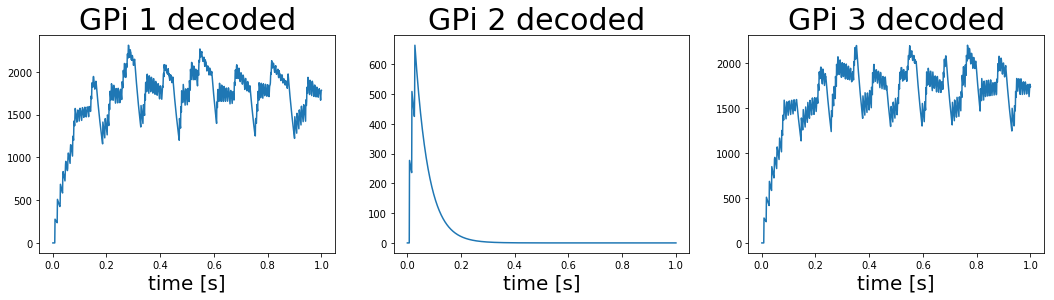

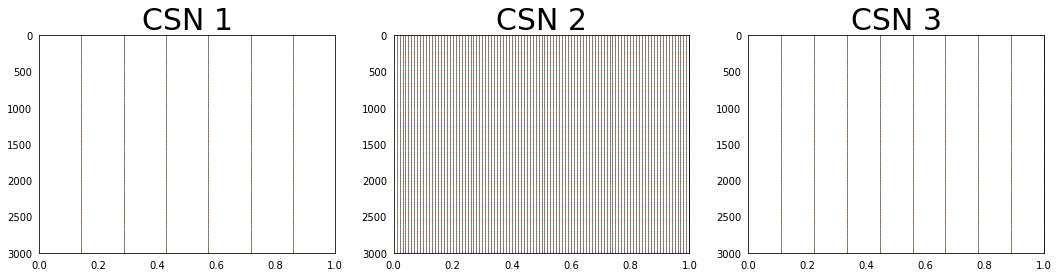

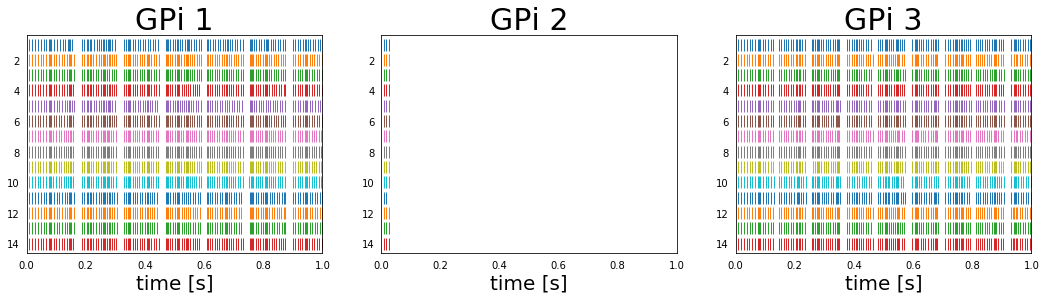

In [5]:
'''plt.figure()


plt.subplot(2, 1, 1)
plt.plot(sim.trange(), sim.data[input_actions].argmax(axis=1))
plt.ylim(-0.1, 2.1)
plt.xlabel('time [s]')
plt.title("Index of actual max value")

plt.show()'''

plt.figure(figsize=(18,4))

plt.subplot(131)

plt.plot(sim.trange(), sim.data[selected_action][:,0])
plt.xlabel('time [s]')
plt.title('GPi 1 decoded', fontdict={'size':30})
plt.xlabel('time [s]', fontdict={"size":20})


plt.subplot(132)

plt.plot(sim.trange(), sim.data[selected_action][:,1])
plt.xlabel('time [s]')
plt.title('GPi 2 decoded ', fontdict={'size':30})
plt.xlabel('time [s]', fontdict={"size":20})


plt.subplot(133)

plt.plot(sim.trange(), sim.data[selected_action][:,2])
plt.xlabel('time [s]')
plt.title('GPi 3 decoded', fontdict={'size':30})
plt.xlabel('time [s]', fontdict={"size":20})

plt.show()


plt.figure(figsize=(18,4))

plt.subplot(131)
rasterplot(sim.trange(), sim.data[CSN[0]])
plt.title("CSN 1", fontdict={'size':30})

plt.subplot(132)

rasterplot(sim.trange(), sim.data[CSN[1]])
plt.title("CSN 2", fontdict={'size':30})


plt.subplot(133)

rasterplot(sim.trange(), sim.data[CSN[2]])
plt.title("CSN 3", fontdict={'size':30})

plt.show()
'''rasterplot(sim.trange(), sim.data[MSN[0]])
plt.xlabel('time [s]')
plt.title("MSN")

plt.show()


rasterplot(sim.trange(), sim.data[MSN[1]])
plt.xlabel('time [s]')
plt.title("MSN")

plt.show()


rasterplot(sim.trange(), sim.data[MSN[2]])
plt.xlabel('time [s]')
plt.title("MSN")

plt.show()'''

plt.figure(figsize=(18,4))
plt.subplot(131)
rasterplot(sim.trange(), sim.data[GPi[0]])
plt.title('GPi 1', fontdict={'size':30})
plt.xlabel('time [s]', fontdict={"size":20})

#plt.show()

plt.subplot(131+1)
rasterplot(sim.trange(), sim.data[GPi[1]])
plt.title('GPi 2', fontdict={'size':30})
plt.xlabel('time [s]', fontdict={"size":20})

#plt.show()

plt.subplot(131+2)
rasterplot(sim.trange(), sim.data[GPi[2]])
plt.title('GPi 3', fontdict={'size':30})
plt.xlabel('time [s]', fontdict={"size":20})

plt.show()
#plt.tight_layout()
